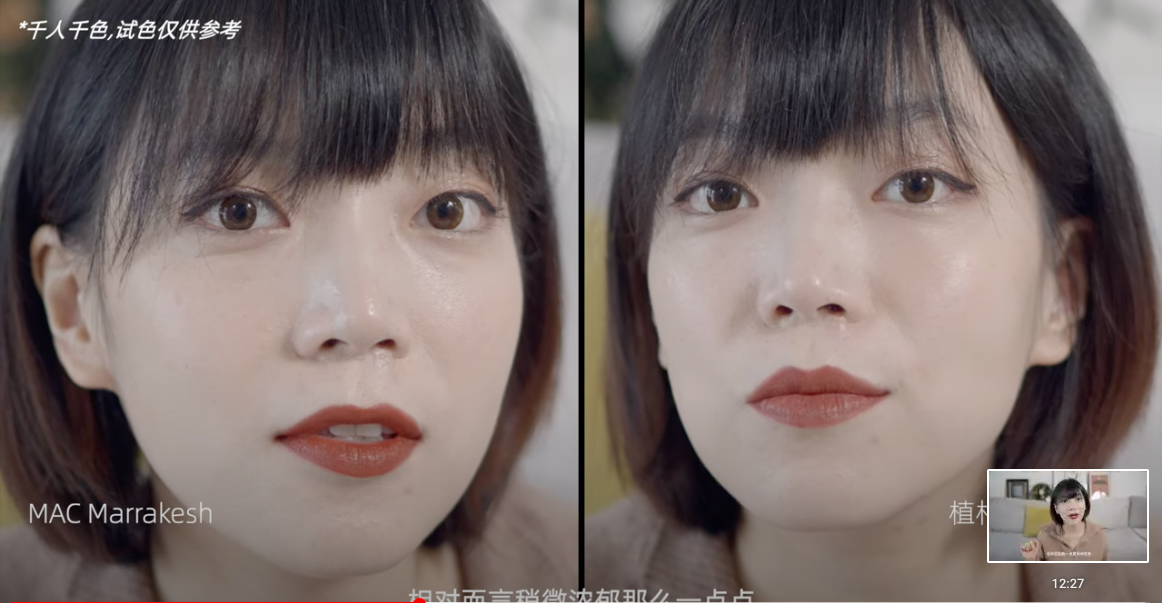

In [1003]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display


def show_image(img):
    """
    Show image in a window
    """
    display(Image.fromarray(img))


image_name = "test_face2.png"

image = cv2.imread(image_name)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)

show_image(image_rgb)


In [1004]:
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

# Load drawing_utils and drawing_styles
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

FACE_MESH_OUTER_LIP = [
    (61, 146), (146, 91), (91, 181), (181, 84), (84, 17), (17, 314), (314, 405),
    (405, 321), (321, 375), (375, 291), (291, 409), (409, 270), (270, 269), 
    (269, 267), (267, 0), (0, 37), (37, 39), (39, 40), (40, 185), (185, 61),
]

FACE_MESH_INNER_LIP = [
    (78, 95), (95, 88), (88, 178), (178, 87), (87, 14), (14, 317), (317, 402), 
    (402, 318), (318, 324), (324, 308), (308, 415), (415, 310), (310, 311), 
    (311, 312), (312, 13), (13, 82), (82, 81), (81, 80), (80, 191), (191, 78),
]

FACE_MESH_LEFT_LOWER_EYEBROW = frozenset([
    (276, 283), (283, 282), (282, 295), (295, 285)
])

FACE_MESH_LEFT_UPPER_EYEBROW = frozenset([
    (300, 293), (293, 334), (334, 296), (296, 336)
])

FACE_MESH_LEFT_EYEBROW_CONNECTIONS = frozenset([(336, 285), (276, 300)])

FACE_MESH_LEFT_EYEBROW_CONTOURS = frozenset().union(*[
    FACE_MESH_LEFT_UPPER_EYEBROW, 
    FACE_MESH_LEFT_LOWER_EYEBROW, 
    FACE_MESH_LEFT_EYEBROW_CONNECTIONS
])

FACE_MESH_RIGHT_LOWER_EYEBROW = frozenset([
    (46, 53), (53, 52), (52, 65), (65, 55)
])

FACE_MESH_RIGHT_UPPER_EYEBROW = frozenset([
    (70, 63), (63, 105), (105, 66), (66, 107)
])

FACE_MESH_RIGHT_EYEBROW_CONNECTIONS = frozenset([(107, 55), (46, 70)])

FACE_MESH_RIGHT_EYEBROW_CONTOURS = frozenset().union(*[
    FACE_MESH_RIGHT_UPPER_EYEBROW,
    FACE_MESH_RIGHT_LOWER_EYEBROW,
    FACE_MESH_RIGHT_EYEBROW_CONNECTIONS
])

FACE_MESH_LEFT_CHEEK = [
    (451, 450), (450, 449), (449, 448), (448, 261), (261, 265),
    (265, 372), (372, 345), (345, 352), (352, 376), (376, 433),
    (433, 416), (416, 434), (434, 432), (432, 436), (436, 426),
    (426, 266), (266, 329), (329, 349), (349, 451)
]

FACE_MESH_RIGHT_CHEEK = [
    (231, 230), (230, 229), (229, 228), (228, 31), (31, 35),
    (35, 143), (143, 116), (116, 123), (123, 147), (147, 213),
    (213, 192), (192, 214), (214, 212), (212, 216), (216, 206),
    (206, 36), (36, 100), (100, 120), (120, 231)
]

FACE_MESH_CHIN = [
    (43, 106), (106, 182), (182, 83), (83, 18), (18, 313),
    (313, 406), (406, 335), (335, 273), (273, 422), (422, 430),
    (430, 394), (394, 395), (395, 369), (369, 396), (396, 175),
    (175, 171), (171, 140), (140, 170), (170, 169), (169, 210),
    (210, 202), (202, 43)
]


In [1005]:
def get_face_mesh(img_rgb):
    # Run MediaPipe Face Mesh.
    with mp_face_mesh.FaceMesh(
            static_image_mode=True,
            refine_landmarks=True,
            max_num_faces=2,
            min_detection_confidence=0.7) as face_mesh:
        results = face_mesh.process(img_rgb)
        return results.multi_face_landmarks
        # annotated_image = image_rgb.copy()
            # for face_landmarks in results.multi_face_landmarks:
                # mp_drawing.draw_landmarks(
                #     image=annotated_image,
                #     landmark_list=face_landmarks,
                #     connections=mp_face_mesh.FACEMESH_TESSELATION,
                #     landmark_drawing_spec=None,
                #     connection_drawing_spec=mp_drawing_styles
                #     .get_default_face_mesh_tesselation_style())
                # for i, landmark in enumerate(face_landmarks.landmark):
                #     landmark_px = mp_drawing._normalized_to_pixel_coordinates(landmark.x, landmark.y, image.shape[1], image.shape[0])
                #     cv2.putText(annotated_image, str(i), landmark_px, cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1)
                # mp_drawing.draw_landmarks(
                #     image=annotated_image,
                #     landmark_list=face_landmarks,
                #     connections=mp_face_mesh.FACEMESH_FACE_OVAL,
                #     landmark_drawing_spec=None,
                #     connection_drawing_spec=mp_drawing_styles
                #     .get_default_face_mesh_contours_style())
                # mp_drawing.draw_landmarks(
                #     image=annotated_image,
                #     landmark_list=face_landmarks,
                #     connections=FACE_MESH_INNER_LIP,
                #     landmark_drawing_spec=None,
                #     connection_drawing_spec=mp_drawing_styles
                #     .get_default_face_mesh_contours_style())
                # mp_drawing.draw_landmarks(
                #     image=annotated_image,
                #     landmark_list=face_landmarks,
                #     connections=FACE_MESH_LEFT_CHEEK,
                #     landmark_drawing_spec=None,
                #     connection_drawing_spec=mp_drawing.DrawingSpec(color=(48, 255, 48), thickness=2))
                # mp_drawing.draw_landmarks(
                #     image=annotated_image,
                #     landmark_list=face_landmarks,
                #     connections=FACE_MESH_RIGHT_CHEEK,
                #     landmark_drawing_spec=None,
                #     connection_drawing_spec=mp_drawing.DrawingSpec(color=(48, 255, 48), thickness=2))
                # mp_drawing.draw_landmarks(
                #     image=annotated_image,
                #     landmark_list=face_landmarks,
                #     connections=FACE_MESH_CHIN,
                #     landmark_drawing_spec=None,
                #     connection_drawing_spec=mp_drawing.DrawingSpec(color=(48, 255, 48), thickness=2))
            # show_image(annotated_image)

In [1006]:
landmark_list = get_face_mesh(image_rgb)

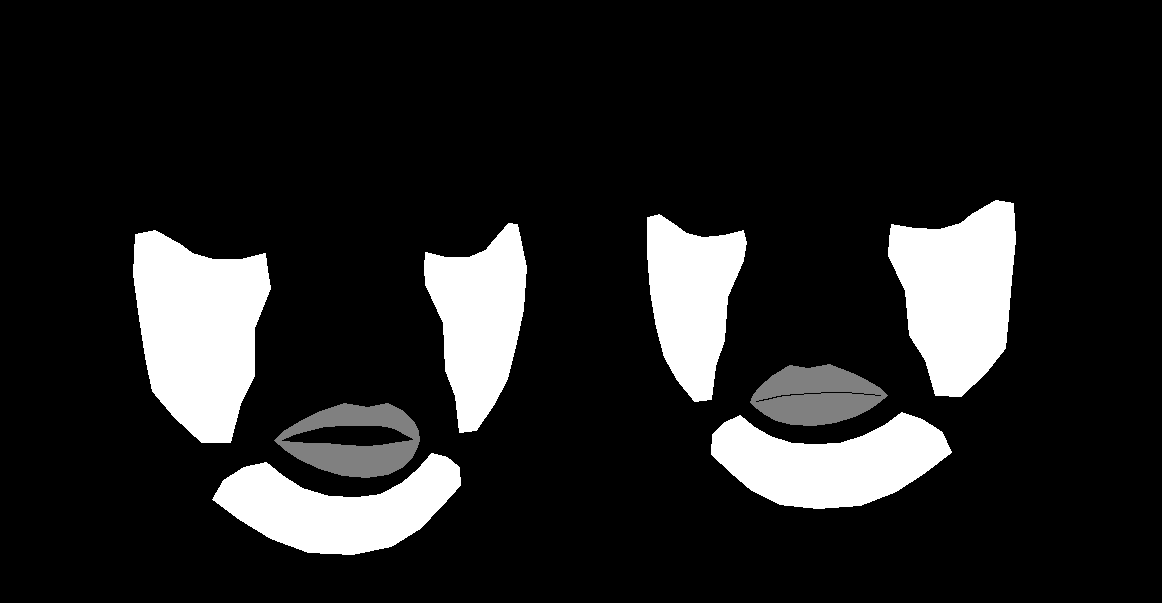

In [1007]:
from itertools import chain

def get_skin_mask(image_shape, landmark_list):
    if landmark_list is None:
        return None
    mask = np.zeros(image_shape[:2], dtype=np.uint8)
    for face_landmarks in landmark_list:
        landmarks = face_landmarks.landmark
        # fill chin
        chin_polygon = []
        for chin_point in FACE_MESH_CHIN:
            chin_point_px = mp_drawing._normalized_to_pixel_coordinates(
                landmarks[chin_point[1]].x, 
                landmarks[chin_point[1]].y, 
                image_shape[1], 
                image_shape[0]
            )
            chin_polygon.append(chin_point_px)
        cv2.fillPoly(mask, pts=[np.array(chin_polygon, dtype=np.int32)], color=255)
        # fill left cheek
        left_cheek_polygon = []
        for left_cheek_point in FACE_MESH_LEFT_CHEEK:
            left_cheek_point_px = mp_drawing._normalized_to_pixel_coordinates(
                landmarks[left_cheek_point[1]].x, 
                landmarks[left_cheek_point[1]].y, 
                image_shape[1], 
                image_shape[0]
            )
            left_cheek_polygon.append(left_cheek_point_px)
        cv2.fillPoly(mask, pts=[np.array(left_cheek_polygon, dtype=np.int32)], color=255)
        # fill right cheek
        right_cheek_polygon = []
        for right_cheek_point in FACE_MESH_RIGHT_CHEEK:
            right_cheek_point_px = mp_drawing._normalized_to_pixel_coordinates(
                landmarks[right_cheek_point[1]].x, 
                landmarks[right_cheek_point[1]].y, 
                image_shape[1], 
                image_shape[0]
            )
            right_cheek_polygon.append(right_cheek_point_px)
        cv2.fillPoly(mask, pts=[np.array(right_cheek_polygon, dtype=np.int32)], color=255)
        # fill outer lip
        outer_lip_polygon = []
        for outer_lip_point in FACE_MESH_OUTER_LIP:
            outer_lip_point_px = mp_drawing._normalized_to_pixel_coordinates(
                landmarks[outer_lip_point[1]].x, 
                landmarks[outer_lip_point[1]].y, 
                image_shape[1], 
                image_shape[0]
            )
            outer_lip_polygon.append(outer_lip_point_px)
        cv2.fillPoly(mask, pts=[np.array(outer_lip_polygon, dtype=np.int32)], color=128)
        # fill inner lip
        inner_lip_polygon = []
        for inner_lip_point in FACE_MESH_INNER_LIP:
            inner_lip_point_px = mp_drawing._normalized_to_pixel_coordinates(
                landmarks[inner_lip_point[1]].x, 
                landmarks[inner_lip_point[1]].y, 
                image_shape[1], 
                image_shape[0]
            )
            inner_lip_polygon.append(inner_lip_point_px)
        cv2.fillPoly(mask, pts=[np.array(inner_lip_polygon, dtype=np.int32)], color=0)
    return mask


mask = get_skin_mask(image.shape, landmark_list)
show_image(mask)

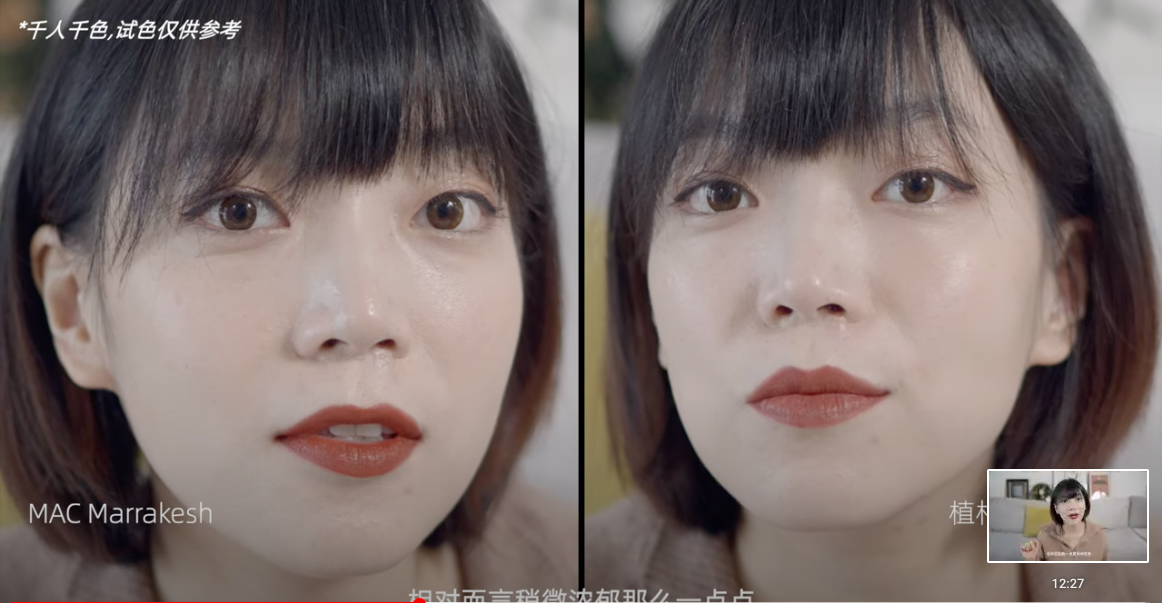

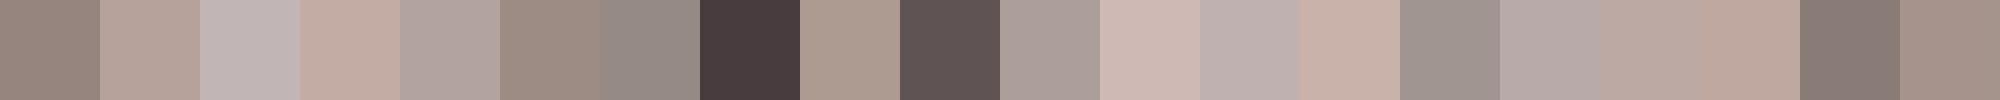

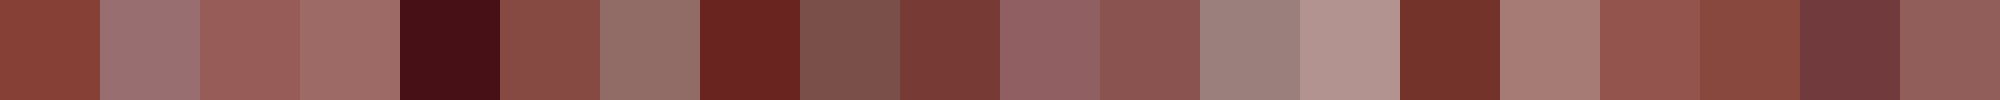

In [1008]:
def get_colors_kmeans(values, K=20):
    Z = np.float32(values)
    # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.0001)
    criteria = (cv2.TERM_CRITERIA_EPS, 100, 0.00001)
    compactness, labels, centers = cv2.kmeans(Z, K, None, criteria, 50, cv2.KMEANS_PP_CENTERS)
    colors = centers
    return colors

def get_palette(colors, size=100, K=10):
    palette = np.zeros((size, K * size, 3), dtype=np.uint8)
    for i in range(colors.shape[0]):
        palette[:, i * size : (i + 1) * size, :] = colors[i, :]
    return palette

skin_k = 20
skin_colors = get_colors_kmeans(image_hsv[mask == 255], K=skin_k)
skin_palette = get_palette(skin_colors, size=100, K=skin_k)
lip_k = 20
lip_colors = get_colors_kmeans(image_hsv[mask == 128], K=lip_k)
lip_palette = get_palette(lip_colors, size=100, K=lip_k)
show_image(image_rgb)
show_image(cv2.cvtColor(skin_palette, cv2.COLOR_HSV2RGB))
show_image(cv2.cvtColor(lip_palette, cv2.COLOR_HSV2RGB))
# show_image(cv2.cvtColor(skin_palette, cv2.COLOR_YCR_CB2RGB))
# show_image(cv2.cvtColor(lip_palette, cv2.COLOR_YCR_CB2RGB))

In [1009]:
def get_histogram_vector(hsv_colors, density=False, normalized=False):
  h_hist, h_hist_edges = np.histogram(hsv_colors[:,0], bins=18, range=(0, 179), density=density)
  # h_hist, h_hist_edges = np.histogram(hsv_colors[:,0], bins=16, range=(0, 255), density=density)
  s_hist, h_hist_edges = np.histogram(hsv_colors[:,1], bins=16, range=(0, 255), density=density)
  v_hist, h_hist_edges = np.histogram(hsv_colors[:,2], bins=16, range=(0, 255), density=density)
  v = np.concatenate((h_hist, s_hist, v_hist), axis=None)
  if normalized:
    return v / np.sqrt(np.sum(v ** 2))
  else:
    return v

skin_vector = get_histogram_vector(skin_colors)
print(skin_vector)
lip_vector = get_histogram_vector(lip_colors)
print(lip_vector)


[17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  8 12  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  1  3  4  6  4  0
  0  0]
[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  2  3  2
  4  3  2  1  1  1  1  0  0  0  0  0  0  0  1  0  1  4  5  7  1  1  0  0
  0  0]


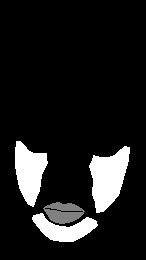

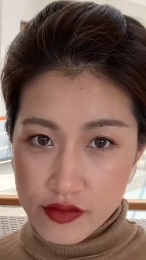

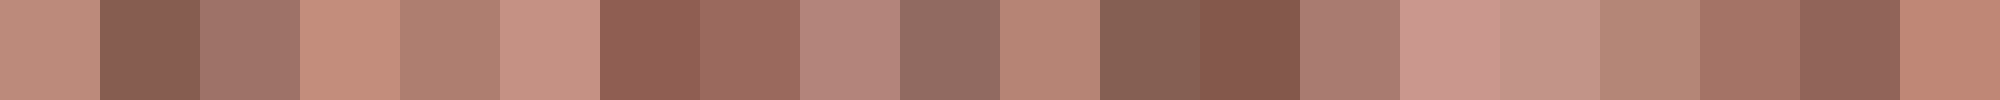

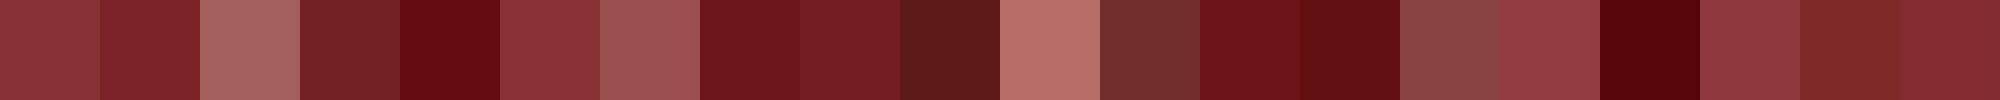

[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3 11
  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  5  3  4  5  0
  0  0]
[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0
  1  1  2  3  4  3  3  2  1  0  0  0  0  0  0  2  4  4  5  3  1  1  0  0
  0  0]


In [1010]:
image2_name = 'test_face9.png'
image2 = cv2.imread(image2_name)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image2_hsv = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)
image2_ycrcb = cv2.cvtColor(image2, cv2.COLOR_BGR2YCR_CB)
landmark_list2 = get_face_mesh(image2_rgb)
mask2 = get_skin_mask(image2.shape, landmark_list2)
show_image(mask2)
show_image(image2_rgb)
skin2_colors = get_colors_kmeans(image2_hsv[mask2 == 255], K=skin_k)
skin2_palette = get_palette(skin2_colors, size=100, K=skin_k)
lip2_colors = get_colors_kmeans(image2_hsv[mask2 == 128], K=lip_k)
lip2_palette = get_palette(lip2_colors, size=100, K=lip_k)
show_image(cv2.cvtColor(skin2_palette, cv2.COLOR_HSV2RGB))
show_image(cv2.cvtColor(lip2_palette, cv2.COLOR_HSV2RGB))
# show_image(cv2.cvtColor(skin2_palette, cv2.COLOR_YCR_CB2RGB))
# show_image(cv2.cvtColor(lip2_palette, cv2.COLOR_YCR_CB2RGB))
skin2_vector = get_histogram_vector(skin2_colors)
print(skin2_vector)
lip2_vector = get_histogram_vector(lip2_colors)
print(lip2_vector)

In [1011]:
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.sqrt(np.dot(v1, v1)) * np.sqrt(np.dot(v2, v2)))

print(cosine_similarity(lip_vector, lip2_vector))
print(cosine_similarity(skin_vector, skin2_vector))

0.8477488003873955
0.6731039985491153


In [1012]:
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

print(euclidean_distance(lip_vector, lip2_vector))
print(euclidean_distance(skin_vector, skin2_vector))

10.862780491200215
20.09975124224178
